Geleneksel: TF-IDF / CountVectorizer / Hashing Vectorizer

Derin Öğrenme: BERT vektörleri

Klasik ML Modelleri:
→ Naive Bayes
→ Random Forest
→ Logistic Regression
→ SVM

Derin Öğrenme Modelleri:
→ BERT + LSTM
→ ANN (Artificial Neural Network)

	Karşılaştırma: Accuracy / Precision / Recall / F1 Score ile tüm modelleri karşılaştırmak

In [17]:
import pandas as pd
import seaborn as sns
import re
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from transformers import BertTokenizer, BertModel
import torch
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE

In [18]:
# Veri Setini Yükleme
file_path = "phishing_site_urls.csv"  # Dosyanın bulunduğu yolu belirtin
df = pd.read_csv(file_path)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [20]:
print("\n Veri seti boyutu:")
print(df.shape)


 Veri seti boyutu:
(549346, 2)


In [21]:
# Eksik değer kontrolü
print("\n Eksik Değer Sayısı:")
print(df.isnull().sum())


 Eksik Değer Sayısı:
URL      0
Label    0
dtype: int64


In [22]:
# Etiket (Label) dağılımı
print("\n Etiket Dağılımı:")
print(df['Label'].value_counts())


 Etiket Dağılımı:
Label
good    392924
bad     156422
Name: count, dtype: int64


In [23]:
# Yinelenen satır sayısını bul
yinelenen_sayi = df.duplicated().sum()
print(f" Yinelenen kayıt sayısı: {yinelenen_sayi}")

 Yinelenen kayıt sayısı: 42150


In [24]:
df = df.drop_duplicates()
print(f" Yinelenen satırlar temizlendi. Yeni veri seti boyutu: {df.shape}")

 Yinelenen satırlar temizlendi. Yeni veri seti boyutu: (507196, 2)


In [25]:
print("Etiket dağılımı (Label):")
print(df['Label'].value_counts())

Etiket dağılımı (Label):
Label
good    392897
bad     114299
Name: count, dtype: int64


In [26]:
# Kategorik Değerlerin İşlenmesi
df['Label'] = df['Label'].map({'good': 1, 'bad': 0})

print(df.head())

                                                 URL  Label
0  nobell.it/70ffb52d079109dca5664cce6f317373782/...      0
1  www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...      0
2  serviciosbys.com/paypal.cgi.bin.get-into.herf....      0
3  mail.printakid.com/www.online.americanexpress....      0
4  thewhiskeydregs.com/wp-content/themes/widescre...      0


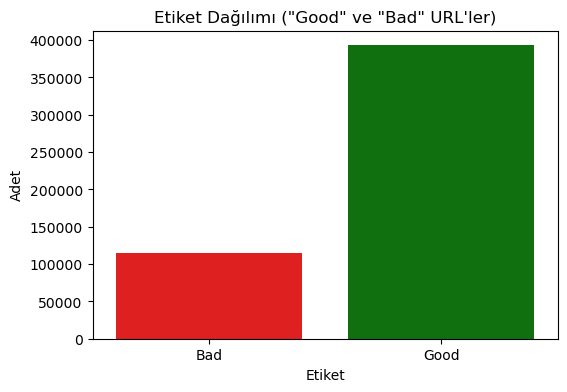

In [27]:
# Etiket dağılımı
plt.figure(figsize=(6,4))
sns.countplot(x=df['Label'], palette=['red', 'green'])
plt.title('Etiket Dağılımı ("Good" ve "Bad" URL\'ler)')
plt.xlabel('Etiket')
plt.ylabel('Adet')
plt.xticks([0, 1], ["Bad", "Good"])
plt.show()

In [28]:
X = df['URL']  # URL'ler
y = df['Label']  # Etiketler

In [29]:
#  Eğitim-Test Ayrımı
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [30]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

# Vektörizerler
vectorizers = {
    "CountVectorizer": CountVectorizer(stop_words='english', max_features=5000),
    "TF-IDF": TfidfVectorizer(stop_words='english', max_features=5000),
    "HashingVectorizer": HashingVectorizer(n_features=5000, alternate_sign=False)
}

In [31]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Modeller
models = {
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
   # "SVM": SVC(kernel='linear', random_state=42)
    "KNN": KNeighborsClassifier(n_neighbors=5)  #varsayılan 5 komşu
}
# Sonuçları Saklayacağımız Liste
results = []

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

for vect_name, vect in vectorizers.items():
    print(f"\n🔵 Vektörizer: {vect_name}")

    # Eğitim ve Test Vektörlerini çıkar
    X_train_vect = vect.fit_transform(X_train)
    X_test_vect = vect.transform(X_test)

    # SMOTE uygulaması
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train_vect, y_train)

    # MODELLER
    for model_name, model in models.items():
        print(f"  🔸 Model: {model_name}")

        # Modeli Eğit
        model.fit(X_train_smote, y_train_smote)

        # Test verisi üzerinde tahmin
        y_pred = model.predict(X_test_vect)

        # Performans Metrikleri
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # Sonuçları kaydet
        results.append({
            "Vectorizer": vect_name,
            "Model": model_name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall": rec,
            "F1-Score": f1
        })



🔵 Vektörizer: CountVectorizer
  🔸 Model: Naive Bayes
  🔸 Model: Random Forest
  🔸 Model: Logistic Regression
  🔸 Model: KNN

🔵 Vektörizer: TF-IDF
  🔸 Model: Naive Bayes
  🔸 Model: Random Forest
  🔸 Model: Logistic Regression
  🔸 Model: KNN

🔵 Vektörizer: HashingVectorizer
  🔸 Model: Naive Bayes
  🔸 Model: Random Forest
  🔸 Model: Logistic Regression
  🔸 Model: KNN


In [33]:
print("SMOTE sonrası eğitim veri seti boyutu:", X_train_smote.shape)
print("SMOTE sonrası etiket dağılımı:", np.bincount(y_train_smote))

SMOTE sonrası eğitim veri seti boyutu: (628634, 5000)
SMOTE sonrası etiket dağılımı: [314317 314317]


In [34]:
from tabulate import tabulate
results_df = pd.DataFrame(results)

print("\n✅ Tüm Sonuçlar:")
print(tabulate(results_df, headers='keys', tablefmt='pretty'))


✅ Tüm Sonuçlar:
+----+-------------------+---------------------+--------------------+--------------------+--------------------+--------------------+
|    |    Vectorizer     |        Model        |      Accuracy      |     Precision      |       Recall       |      F1-Score      |
+----+-------------------+---------------------+--------------------+--------------------+--------------------+--------------------+
| 0  |  CountVectorizer  |     Naive Bayes     | 0.9225847791798107 | 0.9587598105986898 | 0.9405192160855179 | 0.9495519223974561 |
| 1  |  CountVectorizer  |    Random Forest    | 0.9293178233438486 | 0.9678450693152336 | 0.9399847289386613 | 0.9537114746478328 |
| 2  |  CountVectorizer  | Logistic Regression | 0.8934542586750789 | 0.9790488577244967 | 0.8813184016289132 | 0.9276165983551662 |
| 3  |  CountVectorizer  |         KNN         | 0.8697160883280757 | 0.9794472317577678 | 0.8496436752354288 | 0.9099396235672522 |
| 4  |      TF-IDF       |     Naive Bayes     | 0.9

In [36]:
# En iyi sonucu bul
best_result = sorted_results.iloc[0]

print("\n🏆 En İyi Model:")
print(f"Vektörizer: {best_result['Vectorizer']}")
print(f"Model: {best_result['Model']}")
print(f"Accuracy: {best_result['Accuracy']:.4f}")
print(f"F1-Score: {best_result['F1-Score']:.4f}")



🏆 En İyi Model:
Vektörizer: HashingVectorizer
Model: Random Forest
Accuracy: 0.9518
F1-Score: 0.9690


In [66]:
import joblib

# En iyi vektörizer ve model nesnesini kaydet 
joblib.dump(vect, 'hashing_vectorizer.pkl')
joblib.dump(model, 'random_forest_model.pkl')

['random_forest_model.pkl']


🏆 En İyi Model:
Vektörizer: HashingVectorizer
Model: Random Forest
Accuracy: 0.9518
F1-Score: 0.9690


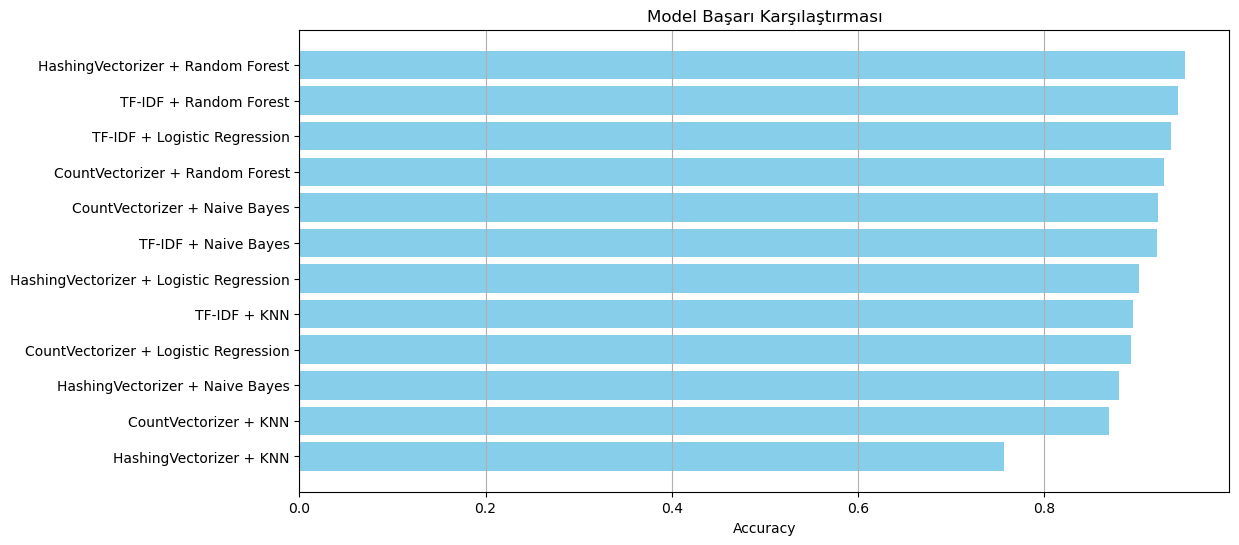

In [38]:
# 1. Sonuçları sıralama
sorted_results = results_df.sort_values(by="Accuracy", ascending=False)

# 2. En iyi model
best_result = sorted_results.iloc[0]

print("\n🏆 En İyi Model:")
print(f"Vektörizer: {best_result['Vectorizer']}")
print(f"Model: {best_result['Model']}")
print(f"Accuracy: {best_result['Accuracy']:.4f}")
print(f"F1-Score: {best_result['F1-Score']:.4f}")

# 3. Accuracy'leri bar chart ile gösterelim
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.barh(
    sorted_results['Vectorizer'] + " + " + sorted_results['Model'],
    sorted_results['Accuracy'],
    color='skyblue'
)
plt.xlabel('Accuracy')
plt.title('Model Başarı Karşılaştırması')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()


In [43]:
!pip install -q sentence-transformers
from sentence_transformers import SentenceTransformer
# BERT modeli yükle
bert_model = SentenceTransformer('all-MiniLM-L6-v2')

# URL'leri küçük harfe çevir (temizleme)
X = df['URL'].str.lower()

# BERT ile embedding çıkar
X_embeddings = bert_model.encode(X.tolist(), show_progress_bar=True)

# Sonuçlar: NumPy Array
print("BERT embedding boyutu:", X_embeddings.shape)


Batches:   0%|          | 0/15850 [00:00<?, ?it/s]

BERT embedding boyutu: (507196, 384)


BERT özelliği çıkarıldı, metinler artık sayısal vektör oldu.

In [46]:
from sklearn.model_selection import train_test_split

y = df['Label'].values  # 0 = bad, 1 = good

X_train, X_test, y_train, y_test = train_test_split(
    X_embeddings, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print("Eğitim seti boyutu:", X_train.shape)
print("Test seti boyutu:", X_test.shape)



Eğitim seti boyutu: (405756, 384)
Test seti boyutu: (101440, 384)


In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Dense(256, activation='relu', input_shape=(384,)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               98560     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 139777 (546.00 KB)
Trainable params: 139

ANN modelin giriş katmanında input_shape=(384,) yazıyor.

Bu 384 boyut, BERT modelinden çıkan embedding boyutu.

Yani doğrudan BERT'in ürettiği embeddingler ANN girişine verildi.

In [48]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/50


6340/6340 [==============================] - 21s 3ms/step - loss: 0.1586 - accuracy: 0.9387 - val_loss: 0.1267 - val_accuracy: 0.9519
Epoch 2/50
6340/6340 [==============================] - 19s 3ms/step - loss: 0.1235 - accuracy: 0.9540 - val_loss: 0.1131 - val_accuracy: 0.9575
Epoch 3/50
6340/6340 [==============================] - 20s 3ms/step - loss: 0.1097 - accuracy: 0.9595 - val_loss: 0.1079 - val_accuracy: 0.9597
Epoch 4/50
6340/6340 [==============================] - 20s 3ms/step - loss: 0.1002 - accuracy: 0.9627 - val_loss: 0.1046 - val_accuracy: 0.9617
Epoch 5/50
6340/6340 [==============================] - 20s 3ms/step - loss: 0.0935 - accuracy: 0.9656 - val_loss: 0.1005 - val_accuracy: 0.9636
Epoch 6/50
6340/6340 [==============================] - 20s 3ms/step - loss: 0.0871 - accuracy: 0.9679 - val_loss: 0.0981 - val_accuracy: 0.9646
Epoch 7/50
6340/6340 [==============================] - 20s 3ms/step - loss: 0.0828 - accuracy: 0.9700 - val_loss: 0.0992 - val_

Kaggle'dan aldığım URL'leri SentenceTransformer modeli (all-MiniLM-L6-v2) ile embedledim. Her URL ➔ 384 boyutlu bir vektör oldu.

BERT embedding'lerini eğitim ve test setine ayırdım.


- Giriş: 384 boyutlu BERT embedding
- Dense katmanlar: 256 ➔ 128 ➔ 64 nöron
- Çıkış: 1 nöron (sigmoid aktivasyon, binary classification)


In [49]:
max_train_acc = max(history.history['accuracy'])
print(f" Eğitim (Train) Setinde En Yüksek Doğruluk: {max_train_acc:.4f}")
max_val_acc = max(history.history['val_accuracy'])
print(f" Doğrulama (Validation) Setinde En Yüksek Doğruluk: {max_val_acc:.4f}")


 Eğitim (Train) Setinde En Yüksek Doğruluk: 0.9790
 Doğrulama (Validation) Setinde En Yüksek Doğruluk: 0.9668


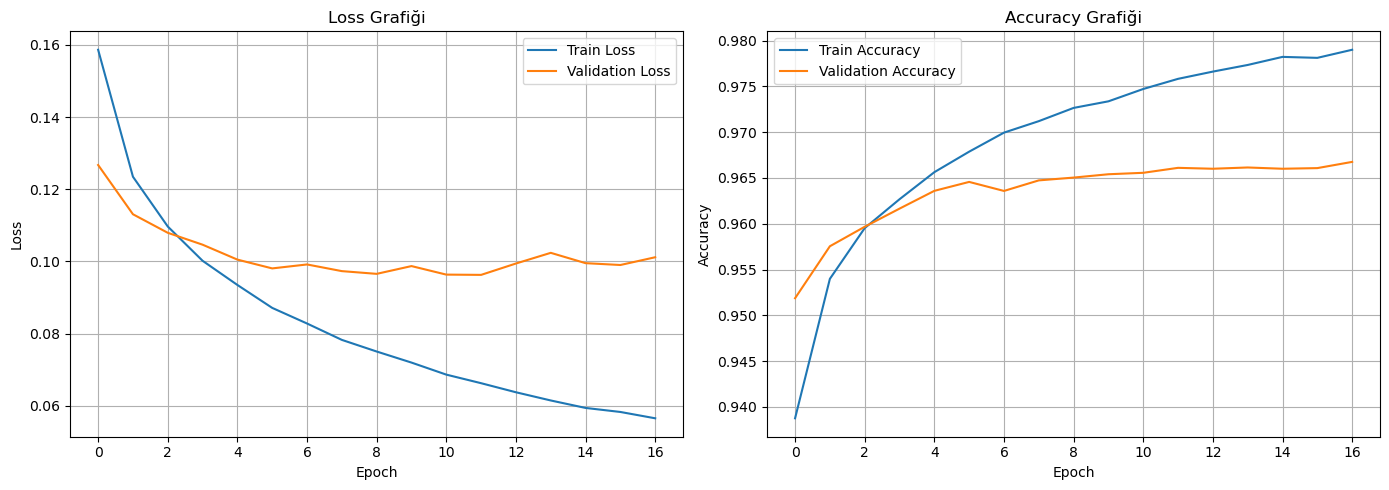

In [50]:
# Loss Grafiği
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Grafiği')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Accuracy Grafiği
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Grafiği')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


In [64]:
model.save("bert_ann_model.h5")

In [58]:
X_embeddings_lstm = np.expand_dims(X_embeddings, axis=-1)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(
    X_embeddings_lstm, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

model_lstm = Sequential([
    LSTM(128, input_shape=(384,1), return_sequences=False),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model_lstm.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model_lstm.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 74881 (292.50 KB)
Trainable params: 74881 (292.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


LSTM(128)	BERT embedding üzerinden 128 adet gizli durum (hidden state) çıkarıyor

Dropout(0.3)	%30 dropout ➔ overfitting önlemek için

Dense(64)	64 nöronlu fully connected katman

Dropout(0.3)	Tekrar dropout ➔ daha güçlü regularization

Dense(1)	1 nöron (sigmoid aktivasyon) ➔ binary sınıflandırma (good vs bad URL)

In [61]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history_lstm = model_lstm.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
6340/6340 [==============================] - 2316s 365ms/step - loss: 0.4805 - accuracy: 0.7864 - val_loss: 0.4309 - val_accuracy: 0.8070
Epoch 2/50
6340/6340 [==============================] - 2288s 361ms/step - loss: 0.3884 - accuracy: 0.8352 - val_loss: 0.3431 - val_accuracy: 0.8563
Epoch 3/50
6340/6340 [==============================] - 2340s 369ms/step - loss: 0.3331 - accuracy: 0.8627 - val_loss: 0.3012 - val_accuracy: 0.8759
Epoch 4/50
6340/6340 [==============================] - 2307s 364ms/step - loss: 0.3001 - accuracy: 0.8776 - val_loss: 0.2793 - val_accuracy: 0.8856
Epoch 5/50
6340/6340 [==============================] - 2565s 405ms/step - loss: 0.2820 - accuracy: 0.8860 - val_loss: 0.2804 - val_accuracy: 0.8818
Epoch 6/50
6340/6340 [==============================] - 2629s 415ms/step - loss: 0.2669 - accuracy: 0.8929 - val_loss: 0.2527 - val_accuracy: 0.8965
Epoch 7/50
6340/6340 [==============================] - 2380s 375ms/step - loss: 0.2541 - accuracy: 0.8992

Batch Size = 64 ➔ her adımda 64 örnek işleniyor.

In [62]:
print(f"📈 En yüksek validation doğruluğu: {max(history_lstm.history['val_accuracy']):.4f}")

📈 En yüksek validation doğruluğu: 0.9379


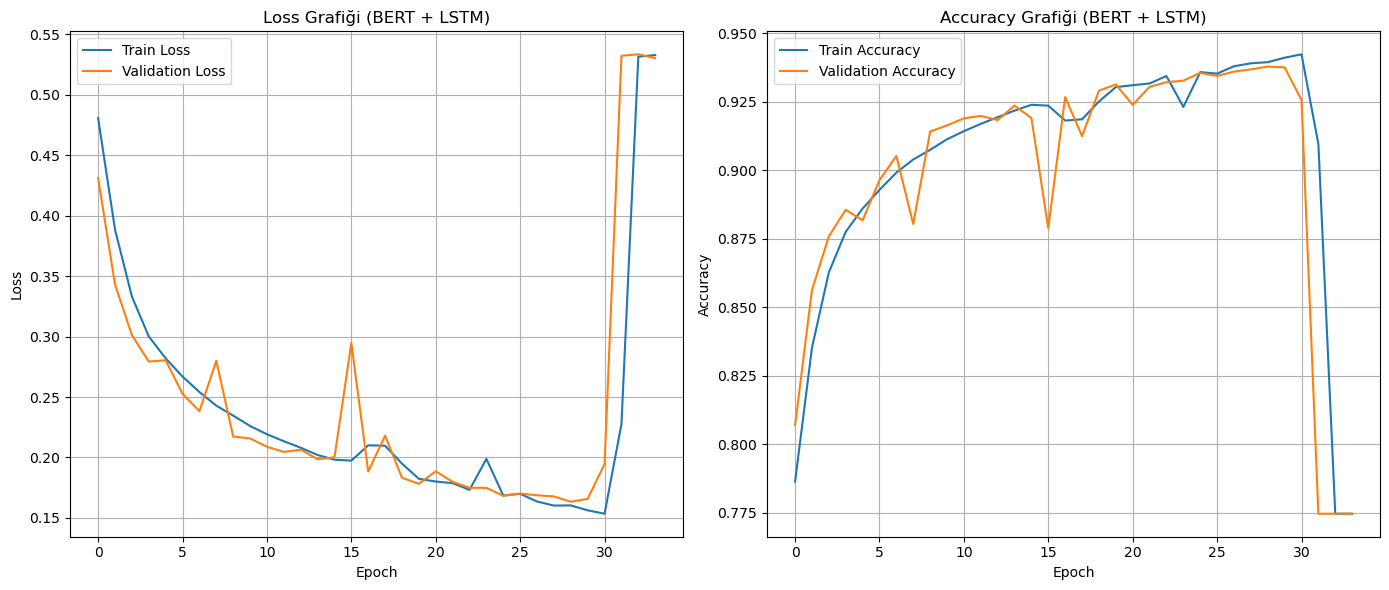

In [63]:
import matplotlib.pyplot as plt

# Grafik boyutu
plt.figure(figsize=(14, 6))

# 1. Loss Grafiği
plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['loss'], label='Train Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('Loss Grafiği (BERT + LSTM)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# 2. Accuracy Grafiği
plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['accuracy'], label='Train Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Grafiği (BERT + LSTM)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Tüm grafikleri hizala
plt.tight_layout()

# Göster
plt.show()


In [65]:
model_lstm.save('bert_lstm_model.h5')